Dataset Overview:
   Satisfaction  Loyalty
0             4    -1.33
1             6    -0.28
2             5    -0.99
3             7    -0.29
4             4     1.06


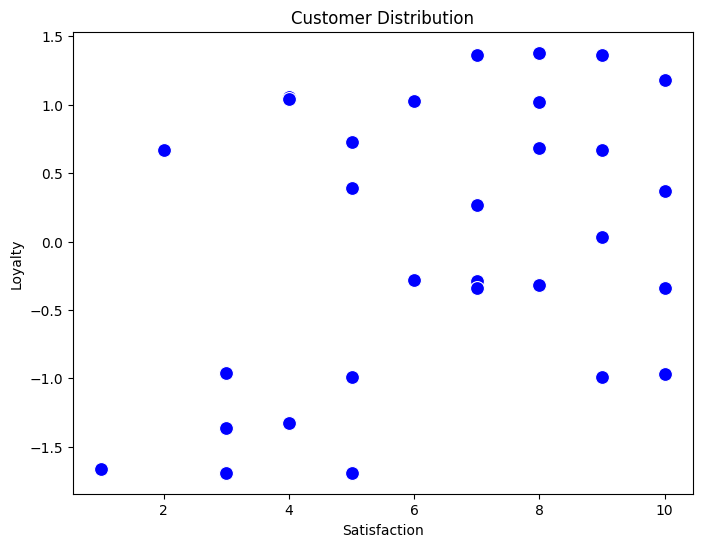

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

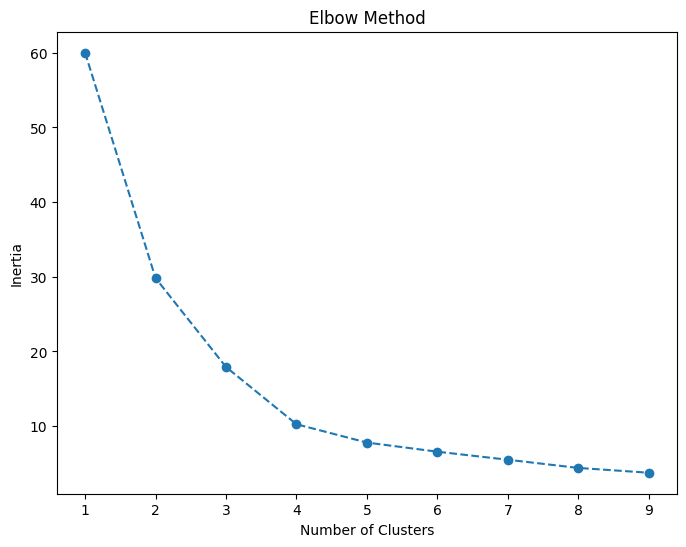

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Clustering Metrics:
Silhouette Score: 0.48
Calinski-Harabasz Index: 42.08
Davies-Bouldin Index: 0.68


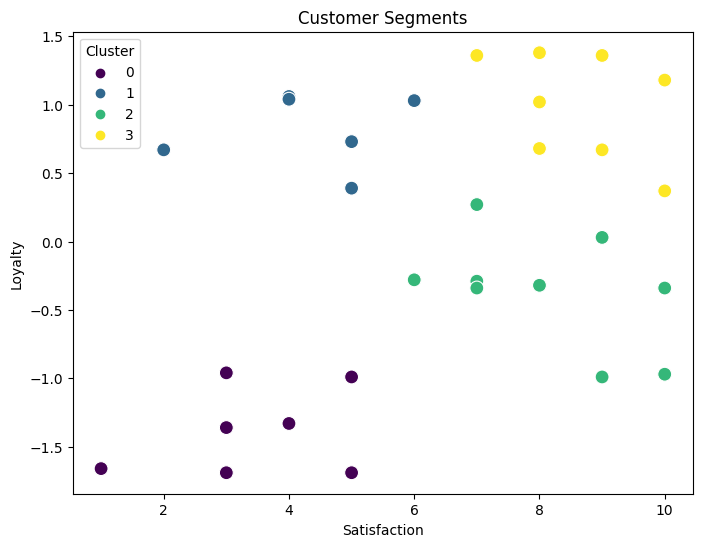


Cluster Profiles:
          Satisfaction   Loyalty
Cluster                        
0            3.428571 -1.382857
1            4.333333  0.820000
2            8.111111 -0.358889
3            8.625000  1.002500

Unusual Customers:
     Satisfaction  Loyalty  Cluster
6             10    -0.97        2
7              8    -0.32        2
10            10    -0.34        2
25             9    -0.99        2


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

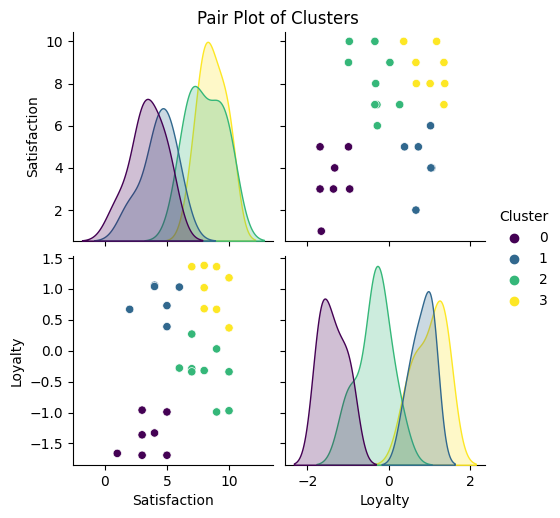

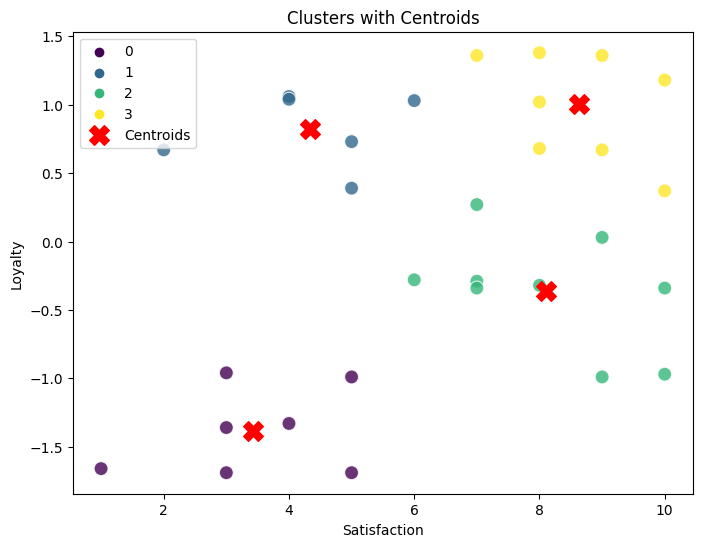

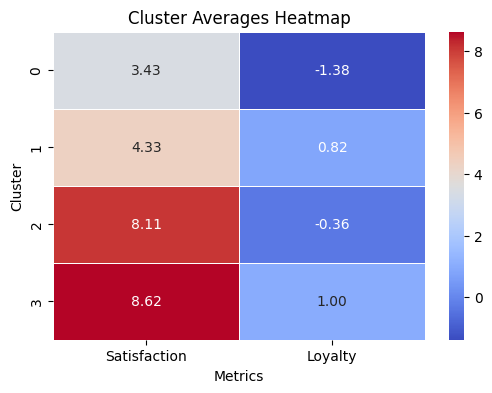

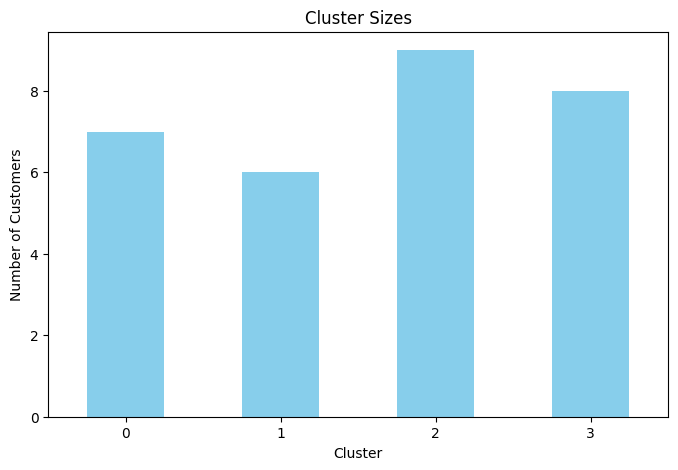

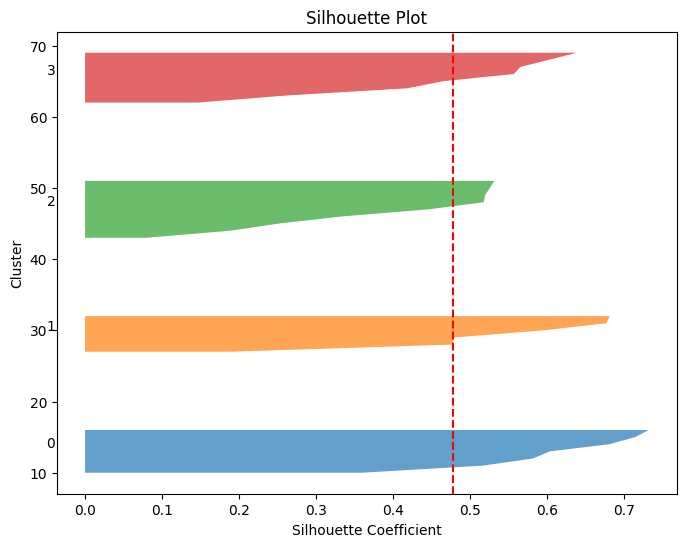

/tmp/ipykernel_30/3390348988.py:132: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Cluster'] == cluster]['Satisfaction'], label=f'Cluster {cluster}', shade=True)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_30/3390348988.py:132: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Cluster'] == cluster]['Satisfaction'], label=f'Cluster {cluster}', shade=True)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

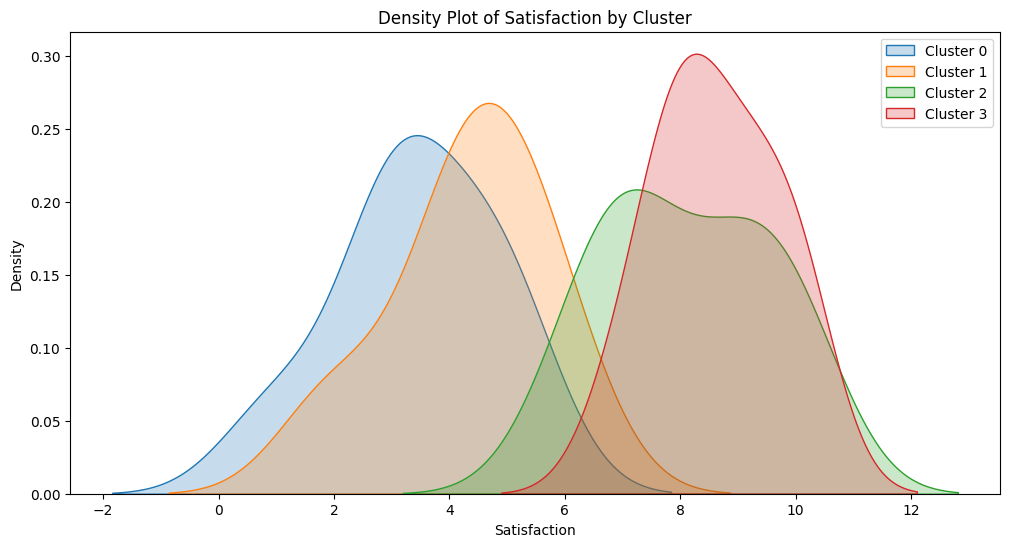

/tmp/ipykernel_30/3390348988.py:140: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Cluster'] == cluster]['Loyalty'], label=f'Cluster {cluster}', shade=True)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_30/3390348988.py:140: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Cluster'] == cluster]['Loyalty'], label=f'Cluster {cluster}', shade=True)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conv

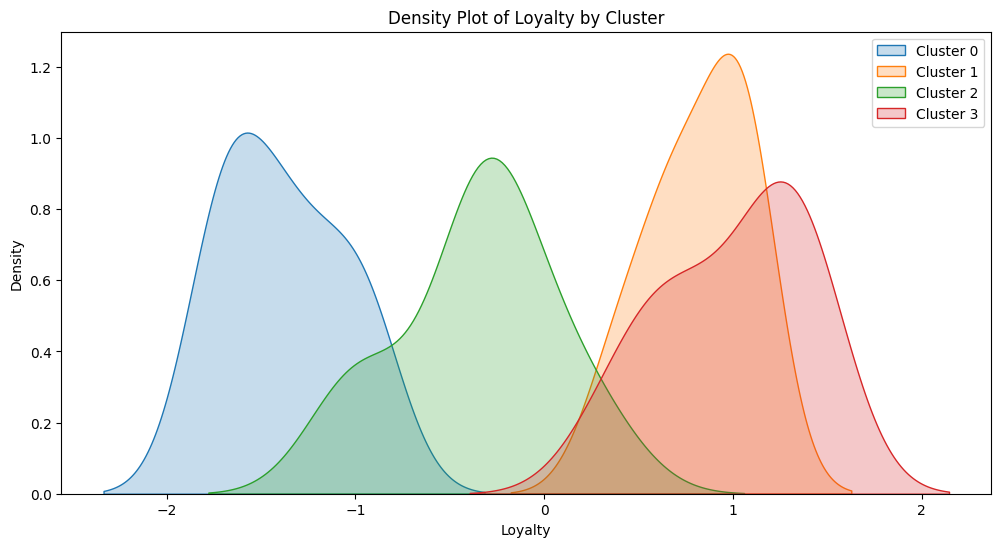

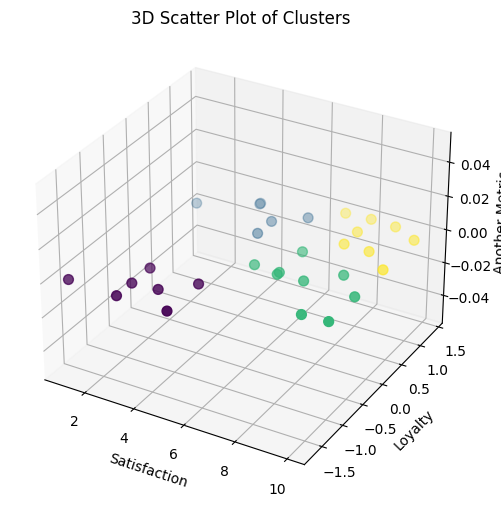

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples, calinski_harabasz_score, davies_bouldin_score
from mpl_toolkits.mplot3d import Axes3D

# Load the data from a CSV file
file_path = "/kaggle/input/ml-fat-lab/Y.csv"  # Update this path if needed
df = pd.read_csv(file_path)

# Display the first few rows of the data
print("Dataset Overview:")
print(df.head())

# Data visualization: Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Satisfaction', y='Loyalty', s=100, color='blue')
plt.title("Customer Distribution")
plt.xlabel("Satisfaction")
plt.ylabel("Loyalty")
plt.show()

# Data standardization
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 10), inertia, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Fit K-Means with the optimal number of clusters
optimal_clusters = 4  # Based on elbow method
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(data_scaled)

# Clustering metrics
silhouette_avg = silhouette_score(data_scaled, df['Cluster'])
calinski_harabasz = calinski_harabasz_score(data_scaled, df['Cluster'])
davies_bouldin = davies_bouldin_score(data_scaled, df['Cluster'])

print("\nClustering Metrics:")
print(f"Silhouette Score: {silhouette_avg:.2f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz:.2f}")
print(f"Davies-Bouldin Index: {davies_bouldin:.2f}")

# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Satisfaction', y='Loyalty', hue='Cluster', palette='viridis', s=100)
plt.title("Customer Segments")
plt.xlabel("Satisfaction")
plt.ylabel("Loyalty")
plt.legend(title='Cluster')
plt.show()

# Analyze clusters
cluster_profiles = df.groupby('Cluster').mean()
print("\nCluster Profiles:\n", cluster_profiles)

# Identify unusual customers
unusual_customers = df[(df['Satisfaction'] > 7) & (df['Loyalty'] < 0)]
print("\nUnusual Customers:\n", unusual_customers)

# Pair Plot (Exploring Relationships)
sns.pairplot(df, hue='Cluster', palette='viridis', diag_kind='kde')
plt.suptitle("Pair Plot of Clusters", y=1.02)
plt.show()

# Cluster Centroid Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Satisfaction', y='Loyalty', hue='Cluster', palette='viridis', s=100, alpha=0.8)
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.title("Clusters with Centroids")
plt.xlabel("Satisfaction")
plt.ylabel("Loyalty")
plt.legend()
plt.show()

# Heatmap of Cluster Averages
plt.figure(figsize=(6, 4))
sns.heatmap(cluster_profiles, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Cluster Averages Heatmap")
plt.xlabel("Metrics")
plt.ylabel("Cluster")
plt.show()

# Bar Chart of Cluster Sizes
cluster_counts = df['Cluster'].value_counts().sort_index()
cluster_counts.plot(kind='bar', color='skyblue', figsize=(8, 5))
plt.title("Cluster Sizes")
plt.xlabel("Cluster")
plt.ylabel("Number of Customers")
plt.xticks(rotation=0)
plt.show()

# Silhouette Plot
silhouette_vals = silhouette_samples(data_scaled, df['Cluster'])
y_lower = 10
plt.figure(figsize=(8, 6))
for i in range(optimal_clusters):
    ith_cluster_silhouette_vals = silhouette_vals[df['Cluster'] == i]
    ith_cluster_silhouette_vals.sort()
    size_cluster_i = ith_cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_vals, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10
plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.title("Silhouette Plot")
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster")
plt.show()

# Cluster Distribution Density Plots
plt.figure(figsize=(12, 6))
for cluster in sorted(df['Cluster'].unique()):
    sns.kdeplot(df[df['Cluster'] == cluster]['Satisfaction'], label=f'Cluster {cluster}', shade=True)
plt.title("Density Plot of Satisfaction by Cluster")
plt.xlabel("Satisfaction")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
for cluster in sorted(df['Cluster'].unique()):
    sns.kdeplot(df[df['Cluster'] == cluster]['Loyalty'], label=f'Cluster {cluster}', shade=True)
plt.title("Density Plot of Loyalty by Cluster")
plt.xlabel("Loyalty")
plt.legend()
plt.show()

# 3D Scatter Plot (if an additional metric exists)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Satisfaction'], df['Loyalty'], c=df['Cluster'], cmap='viridis', s=50)
ax.set_xlabel("Satisfaction")
ax.set_ylabel("Loyalty")
ax.set_zlabel("Another Metric")
plt.title("3D Scatter Plot of Clusters")
plt.show()